In [1]:
library(EnvStats)
library(ggplot2)
library(repr)
library(abind)
options(repr.plot.width=5, repr.plot.height=4)
rm(list=ls())


Attaching package: 'EnvStats'

The following objects are masked from 'package:stats':

    predict, predict.lm

The following object is masked from 'package:base':

    print.default



In [72]:
N <- 10
T <- 1000
location <- 100
shape <- 12

In [74]:
# Pareto Orthogonal Ensemble
H <- array(rpareto(N^2*T, location=location, shape=shape), dim=c(N,N,T))
xOE <- apply(H, 3, FUN=function(x) eigen((x+t(x))/2)$values)

In [69]:
# Pareto Unitary Ensemble
H <- array(rpareto(N^2*T, location=location, shape=shape)+rpareto(N^2*T, location=location, shape=shape)*1i, dim=c(N,N,T))
xUE <- as.numeric(apply(H, 3, FUN=function(x) eigen((x+Conj(t(x)))/2)$values))

In [70]:
# Pareto Symplectic Ensemble
A <- array(rpareto(N^2*T, location=location, shape=shape)+rpareto(N^2*T, location=location, shape=shape)*1i, dim=c(N,N,T))
B <- array(rpareto(N^2*T, location=location, shape=shape)+rpareto(N^2*T, location=location, shape=shape)*1i, dim=c(N,N,T))
H <- abind(x=abind(x=A,y=B,along=2), y=abind(x=-Conj(B),y=Conj(A),along=2), along=1)
dimnames(H) <- NULL
xSE <- as.numeric(apply(H, 3, FUN=function(x) eigen((x+Conj(t(x)))/2)$values))

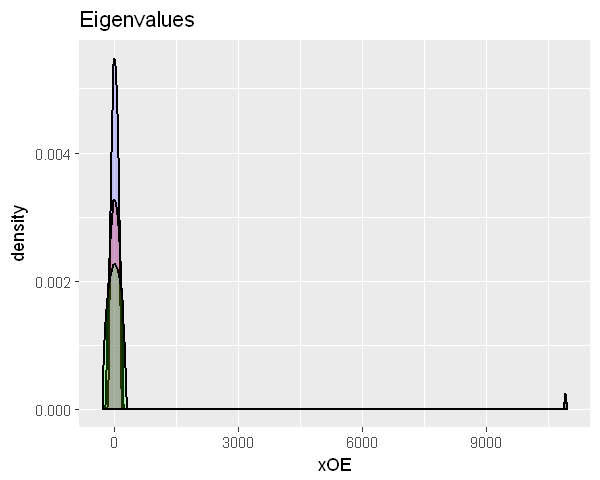

In [71]:
# Eigenvalues
ggplot() +
    geom_density(aes(x=xOE), fill='blue', alpha=0.2, size=0.7) +
    geom_density(aes(x=xUE), fill='red', alpha=0.2, size=0.7) +
    geom_density(aes(x=xSE), fill='green', alpha=0.2, size=0.7) +
    labs(title='Eigenvalues')